FEATURE ENGINERRING

EXPLORATORY DATA ANALYSIS ON 
LOAN DEFAULT CHALLANGE DATA SET 


FEATURE ENGINEERING:

STEP 1-EDA:

     1) NUMERICAL AND CATEGORICAL FEATURES :HISTOGRAMS

     2)OBSERVING TRHE CATEGORIES IN THAT CATEGORICAL FEATURES

     3)MISSSING DATA ANALYSIS:VISULIZE ALL THE GRAPHS 

     4)OUTLIER:BOX PLOT
STEP2:HANDLING THE MISSING VALUES BY DIFFERENT APPROACHES:

      1)MEAN

      2)MEDIAN

      3)MODE

      4)REPLACE 

      5)USING IQR(INTER QUARTILE RANGE) FOR REMOVING OUTLIERS
STEP 3:HANDLING IMBALANCED DATASET---(KEEPING ML ALGORITHMS IN MIND)

4)TREATING OUTLIERS BY DIFF APPROACHES(EX: IQR)

5)SCALING DOWN THE DATA:

     1)NORMALIZAYTION

     2)STANRDIZATION
6)CONVERTING THE CATEGORICAL FETURES INTO NUMERICAL FEATURES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [69]:
loan=pd.read_csv('train_sample.csv')
loan

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,3/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,1/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1/8/1988,Salaried,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,5/12/1988,Self employed,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1/6/1976,Salaried,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0


In [3]:
loan.dtypes

UniqueID                           int64
disbursed_amount                   int64
asset_cost                       float64
ltv                              float64
branch_id                        float64
supplier_id                      float64
manufacturer_id                  float64
Current_pincode_ID               float64
Date.of.Birth                     object
Employment.Type                   object
DisbursalDate                     object
State_ID                         float64
Employee_code_ID                 float64
MobileNo_Avl_Flag                float64
Aadhar_flag                      float64
PAN_flag                         float64
VoterID_flag                     float64
Driving_flag                     float64
Passport_flag                    float64
PERFORM_CNS.SCORE                float64
PERFORM_CNS.SCORE.DESCRIPTION     object
PRI.NO.OF.ACCTS                  float64
PRI.ACTIVE.ACCTS                 float64
PRI.OVERDUE.ACCTS                float64
PRI.CURRENT.BALA

**numerical variables**:disbursed_amount,asset_cost,ltv,Current_pincode_ID,PERFORM_CNS.SCORE ,PERFORM_CNS.SCORE.DESCRIPTION ,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES

**categorical variables**:branch_id,supplier_id,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID                   MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,loan_default                          


The first five rows of the data set for a glance

In [ ]:
loan.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,3/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,1/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,1,1


In [ ]:
loan.tail()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
233149,626432,63213,105405,60.72,34,20700,48,1050,1/8/1988,Salaried,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,5/12/1988,Self employed,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1/6/1976,Salaried,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
233153,630213,75751,116009,66.81,77,22186,86,2299,18-02-84,Salaried,27-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0


No of rows and columns in the data set

In [4]:
loan.shape

(7532, 29)

We got to know that we have 233154 observations and 29 attributes(nothing but rows and columns respectively) 

In [5]:
loan.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
count,7532.000000,7532.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.0,7531.00000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7.531000e+03,7.531000e+03,7.531000e+03,7531.000000,7531.000000
mean,541449.374668,53811.508630,78156.177666,71.956421,49.712256,19030.435400,66.059620,4763.040366,6.850219,1046.003187,1.0,0.72580,0.069314,0.247245,0.031470,0.001726,247.123490,1.878237,0.796176,0.116983,1.020150e+05,1.312261e+05,1.303977e+05,0.163059,0.207675
std,68356.457070,12438.029929,18206.821701,11.909603,48.347455,3276.930105,20.782368,1997.940107,4.779341,548.322391,0.0,0.44614,0.254003,0.431439,0.174596,0.041514,330.611025,4.117938,1.600387,0.471771,5.502771e+05,6.189208e+05,6.183388e+05,0.713721,0.405670
min,417430.000000,5.000000,39605.000000,17.050000,1.000000,12311.000000,45.000000,4.000000,1.000000,45.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.133510e+05,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,482810.750000,46405.750000,66884.000000,65.400000,10.000000,16309.000000,45.000000,2963.000000,3.000000,505.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,542821.000000,53303.000000,73001.000000,74.280000,36.000000,18110.000000,51.000000,5422.000000,5.000000,1121.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,604812.750000,60213.000000,83031.000000,80.000000,65.000000,22746.000000,86.000000,6277.000000,13.000000,1560.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,640.000000,2.000000,1.000000,0.000000,1.582850e+04,4.000000e+04,3.707400e+04,0.000000,0.000000
max,658637.000000,157511.000000,225100.000000,94.990000,152.000000,24787.000000,145.000000,7149.000000,18.000000,1998.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,879.000000,56.000000,21.000000,14.000000,2.517333e+07,2.536257e+07,2.536257e+07,19.000000,1.000000


 We got our basic statistics of each attribute now.
 *we got the mean of the attributes
 *we got the standard deviation(std) of the attributes from which we can even find the variance of the attributes.
 *and some percentage statistics which we can use in inter quartike range(IQR)(statistics) which we will be using in outlier detection techniques.

In [44]:
loan['manufacturer_id'].value_counts()

86     97103
45     49111
51     23057
48     14090
49      9349
120     8003
67      2136
145      691
153        9
156        1
Name: manufacturer_id, dtype: int64

By the above manfacturing id's we got to know that there are different employees applying loan from different manufacturing companies.

In [45]:
loan['Current_pincode_ID'].value_counts()

2578    1612
1446    1557
1515     942
1794     783
2989     773
        ... 
3441       1
4050       1
1433       1
5531       1
6720       1
Name: Current_pincode_ID, Length: 6194, dtype: int64

The number of manufacturer_id are matched to the number of current_pincode_id so the manufacturing companies are from that particular pincodes.

As next we havee to check the companies identification through that given details and we can proceed for the next loan steps.

In [46]:
loan.value_counts()

UniqueID  disbursed_amount  asset_cost  ltv    branch_id  supplier_id  manufacturer_id  Current_pincode_ID  Date.of.Birth  Employment.Type  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  PERFORM_CNS.SCORE.DESCRIPTION                 PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT  NO.OF_INQUIRIES  loan_default
658676    34484             72592       48.21  48         24124        51               6370                10/4/1996      Salaried         31-10-18       5.0       1571.0            1.0                0.0          0.0       1.0           0.0           0.0            0.0                No Bureau History Available                   0.0              0.0               0.0                0.0                  0.0                    0.0                   0.0              0.0             1
493422    48783             6

In [47]:
loan['ltv'].value_counts() ##ltv means LOAN TO VALUE(express the ratio of a loan to the value of an asset purchased)

85.00    4048
84.99     937
79.99     460
80.00     425
75.00     355
         ... 
22.12       1
91.64       1
40.99       1
26.17       1
21.89       1
Name: ltv, Length: 6479, dtype: int64

In [48]:
print(loan['disbursed_amount'].max())
print(loan['disbursed_amount'].min())
print(loan['disbursed_amount'].mean())
54145.305646

987354
13320
54364.81728813559


54145.305646

The maximum amount distributed to the employes for loan is 987354
and the average amount distributed is 53127.5717

In [49]:
loan['disbursed_amount'].head()

0    50578
1    47145
2    53278
3    57513
4    52378
Name: disbursed_amount, dtype: int64

In [50]:
loan[['disbursed_amount','asset_cost']]

,disbursed_amount,asset_cost
0,50578,58400
1,47145,65550
2,53278,61360
3,57513,66113
4,52378,60300
...,...,...
203545,57959,74550
203546,58209,74450
203547,39139,52492
203548,66869,86272


In [51]:
loan['disbursed_amount']<loan['asset_cost']

0         True
1         True
2         True
3         True
4         True
          ... 
203545    True
203546    True
203547    True
203548    True
203549    True
Length: 203550, dtype: bool

In [52]:
loan.shape

(203550, 29)

In [53]:
details_of_assets=loan['asset_cost']>loan['disbursed_amount']
details_of_assets

0         True
1         True
2         True
3         True
4         True
          ... 
203545    True
203546    True
203547    True
203548    True
203549    True
Length: 203550, dtype: bool

In [54]:
details_of_assets.shape 

(203550,)

We got to know that the assets cost of each employee is greater then thier disbursed_amount(ofcourse everyone are eligible for the loan).
*This metrics will help us that assets can retrieve our loan back or not.

I found that the date_of_birth and disbursal date  columns  were  not  appropriate manner.
so we will just convert them into appropriate manner

In [94]:
loan['Date.of.Birth']=pd.to_datetime(loan['Date.of.Birth'])

In [95]:
loan['DisbursalDate']=pd.to_datetime(loan['DisbursalDate'])

In [58]:
loan

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,598.0,I-Medium Risk,1.0,1.0,1.0,27600.0,50200.0,50200.0,0.0,1.0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,305.0,L-Very High Risk,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203545,449066,57959,74550,79.14,5,17408,51,3340,1978-06-30,Self employed,2018-08-20,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,300.0,M-Very High Risk,4.0,2.0,1.0,43071.0,96486.0,96486.0,0.0,0.0
203546,558063,58209,74450,79.58,5,17408,51,3340,1980-01-01,Self employed,2018-04-10,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,300.0,M-Very High Risk,2.0,2.0,1.0,154558.0,156343.0,156343.0,0.0,0.0
203547,630715,39139,52492,76.20,5,17408,51,3367,1973-01-01,Self employed,2018-10-27,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203548,568349,66869,86272,78.82,5,17408,51,3355,1980-04-09,Self employed,2018-11-10,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,738.0,C-Very Low Risk,3.0,3.0,0.0,38322.0,47000.0,47000.0,1.0,0.0


*List of the type of employees(wheather saalried or self employed) 
form this we can find that they can pay intrest monthly (on date) or not

In [59]:
loan[loan['Employment.Type']=='Salaried']   

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,529269,46349,61500,76.42,67,22807,45,1502,1988-01-06,Salaried,2018-09-23,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,510278,43894,61900,71.89,67,22807,45,1501,1989-04-10,Salaried,2018-09-16,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,17.0,Not Scored: Not Enough Info available on the c...,1.0,1.0,0.0,72879.0,74500.0,74500.0,0.0,0.0
9,510980,52603,61300,86.95,67,22807,45,1492,1968-01-06,Salaried,2018-09-16,6.0,1998.0,1.0,0.0,0.0,1.0,0.0,0.0,818.0,A-Very Low Risk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,486821,64769,74190,89.23,67,22807,45,1446,1984-07-09,Salaried,2018-03-09,6.0,1998.0,1.0,1.0,0.0,0.0,0.0,0.0,786.0,B-Very Low Risk,3.0,2.0,0.0,676.0,36154.0,23374.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203531,586971,56959,68855,84.23,5,21721,45,3355,1977-06-12,Salaried,2018-10-18,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,591.0,I-Medium Risk,16.0,2.0,0.0,23000.0,40999.0,40999.0,0.0,0.0
203532,618565,62913,81294,78.73,5,17408,51,3329,2063-06-25,Salaried,2018-10-25,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203538,551469,56459,73780,77.93,5,17408,51,3308,1996-02-23,Salaried,2018-09-30,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No Bureau History Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203541,629317,70023,89900,79.20,138,20470,86,3352,1979-05-06,Salaried,2018-10-27,9.0,3144.0,1.0,1.0,0.0,0.0,0.0,0.0,300.0,M-Very High Risk,2.0,1.0,2.0,26700.0,26700.0,26700.0,2.0,1.0


97858 salaried employess are there in our data so,we may expect them that they can pay intrest on time

In [70]:
loan.isnull().sum()

UniqueID                            0
disbursed_amount                    0
asset_cost                          0
ltv                                 0
branch_id                           0
supplier_id                         0
manufacturer_id                     0
Current_pincode_ID                  0
Date.of.Birth                       0
Employment.Type                  7661
DisbursalDate                       0
State_ID                            0
Employee_code_ID                    0
MobileNo_Avl_Flag                   0
Aadhar_flag                         0
PAN_flag                            0
VoterID_flag                        0
Driving_flag                        0
Passport_flag                       0
PERFORM_CNS.SCORE                   0
PERFORM_CNS.SCORE.DESCRIPTION       0
PRI.NO.OF.ACCTS                     0
PRI.ACTIVE.ACCTS                    0
PRI.OVERDUE.ACCTS                   0
PRI.CURRENT.BALANCE                 0
PRI.SANCTIONED.AMOUNT               0
PRI.DISBURSE

In our data we have 7661 null values in employment.type attribute:
 

Now we try to clean them and fill with an appropriate values:

In [71]:
loan[loan['Employment.Type'].isnull()]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
87,525234,52428,67405,81.60,78,17014,45,2099,5/8/1998,NaN,21-09-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
88,637252,51653,63896,86.08,78,17014,45,2079,24-02-99,NaN,29-10-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
91,584433,49488,63306,83.72,78,17014,45,2069,27-11-98,NaN,17-10-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
99,515149,40884,59313,70.81,78,17014,45,2099,24-02-98,NaN,18-09-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
125,547112,49683,62577,83.10,78,17014,45,2099,1/1/1998,NaN,29-09-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231722,494458,43272,59313,74.86,78,17014,45,2093,3/3/1998,NaN,7/9/2018,4,218,1,1,0,0,0,0,763,B-Very Low Risk,1,1,0,3927,27000,27000,3,0
231737,419420,36750,62852,60.14,78,17014,45,2082,1/1/1998,NaN,3/8/2018,4,218,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
231756,553774,50683,67746,79.71,78,16803,86,2055,16-08-99,NaN,30-09-18,4,119,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
231767,594901,55728,74748,79.60,78,16803,86,2073,1/1/1999,NaN,21-10-18,4,119,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0


The reason might be that some of the employess are hesitate  to expose thier work details so there are many NAN values in Employement.type 

In [ ]:
loan['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

Replacing the NAN values with least common values which is salaried

In [96]:
loan['Employment.Type']=loan['Employment.Type'].fillna('Salaried')

In [97]:
loan.isnull().sum()     

UniqueID                         0
disbursed_amount                 0
asset_cost                       0
ltv                              0
branch_id                        0
supplier_id                      0
manufacturer_id                  0
Current_pincode_ID               0
Date.of.Birth                    0
Employment.Type                  0
DisbursalDate                    0
State_ID                         0
Employee_code_ID                 0
MobileNo_Avl_Flag                0
Aadhar_flag                      0
PAN_flag                         0
VoterID_flag                     0
Driving_flag                     0
Passport_flag                    0
PERFORM_CNS.SCORE                0
PERFORM_CNS.SCORE.DESCRIPTION    0
PRI.NO.OF.ACCTS                  0
PRI.ACTIVE.ACCTS                 0
PRI.OVERDUE.ACCTS                0
PRI.CURRENT.BALANCE              0
PRI.SANCTIONED.AMOUNT            0
PRI.DISBURSED.AMOUNT             0
NO.OF_INQUIRIES                  0
loan_default        

In [98]:
loan.drop_duplicates() ##NO duplicates in our data set

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1988-01-08,Salaried,2018-10-26,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,1988-05-12,Self employed,2018-10-23,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1976-01-06,Salaried,2018-10-24,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,1994-03-26,Salaried,2018-09-29,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0


We done with cleaning the NAN values in our data set 

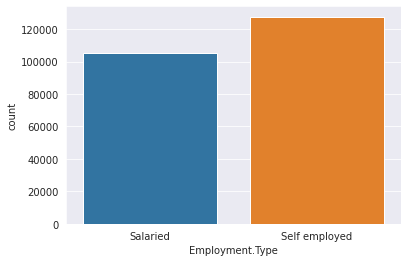

In [ ]:
sb.set_style('darkgrid')
sb.countplot(x='Employment.Type' ,data=loan)  ##counts of Employee.typ

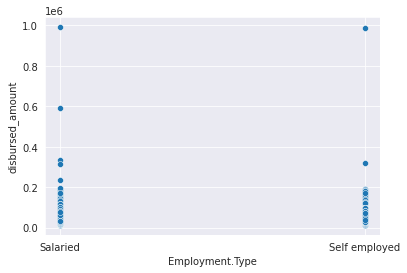

In [ ]:
sb.set_style('darkgrid')
sb.scatterplot(x='Employment.Type',y='disbursed_amount' ,data=loan)  ##counts of Employee.type

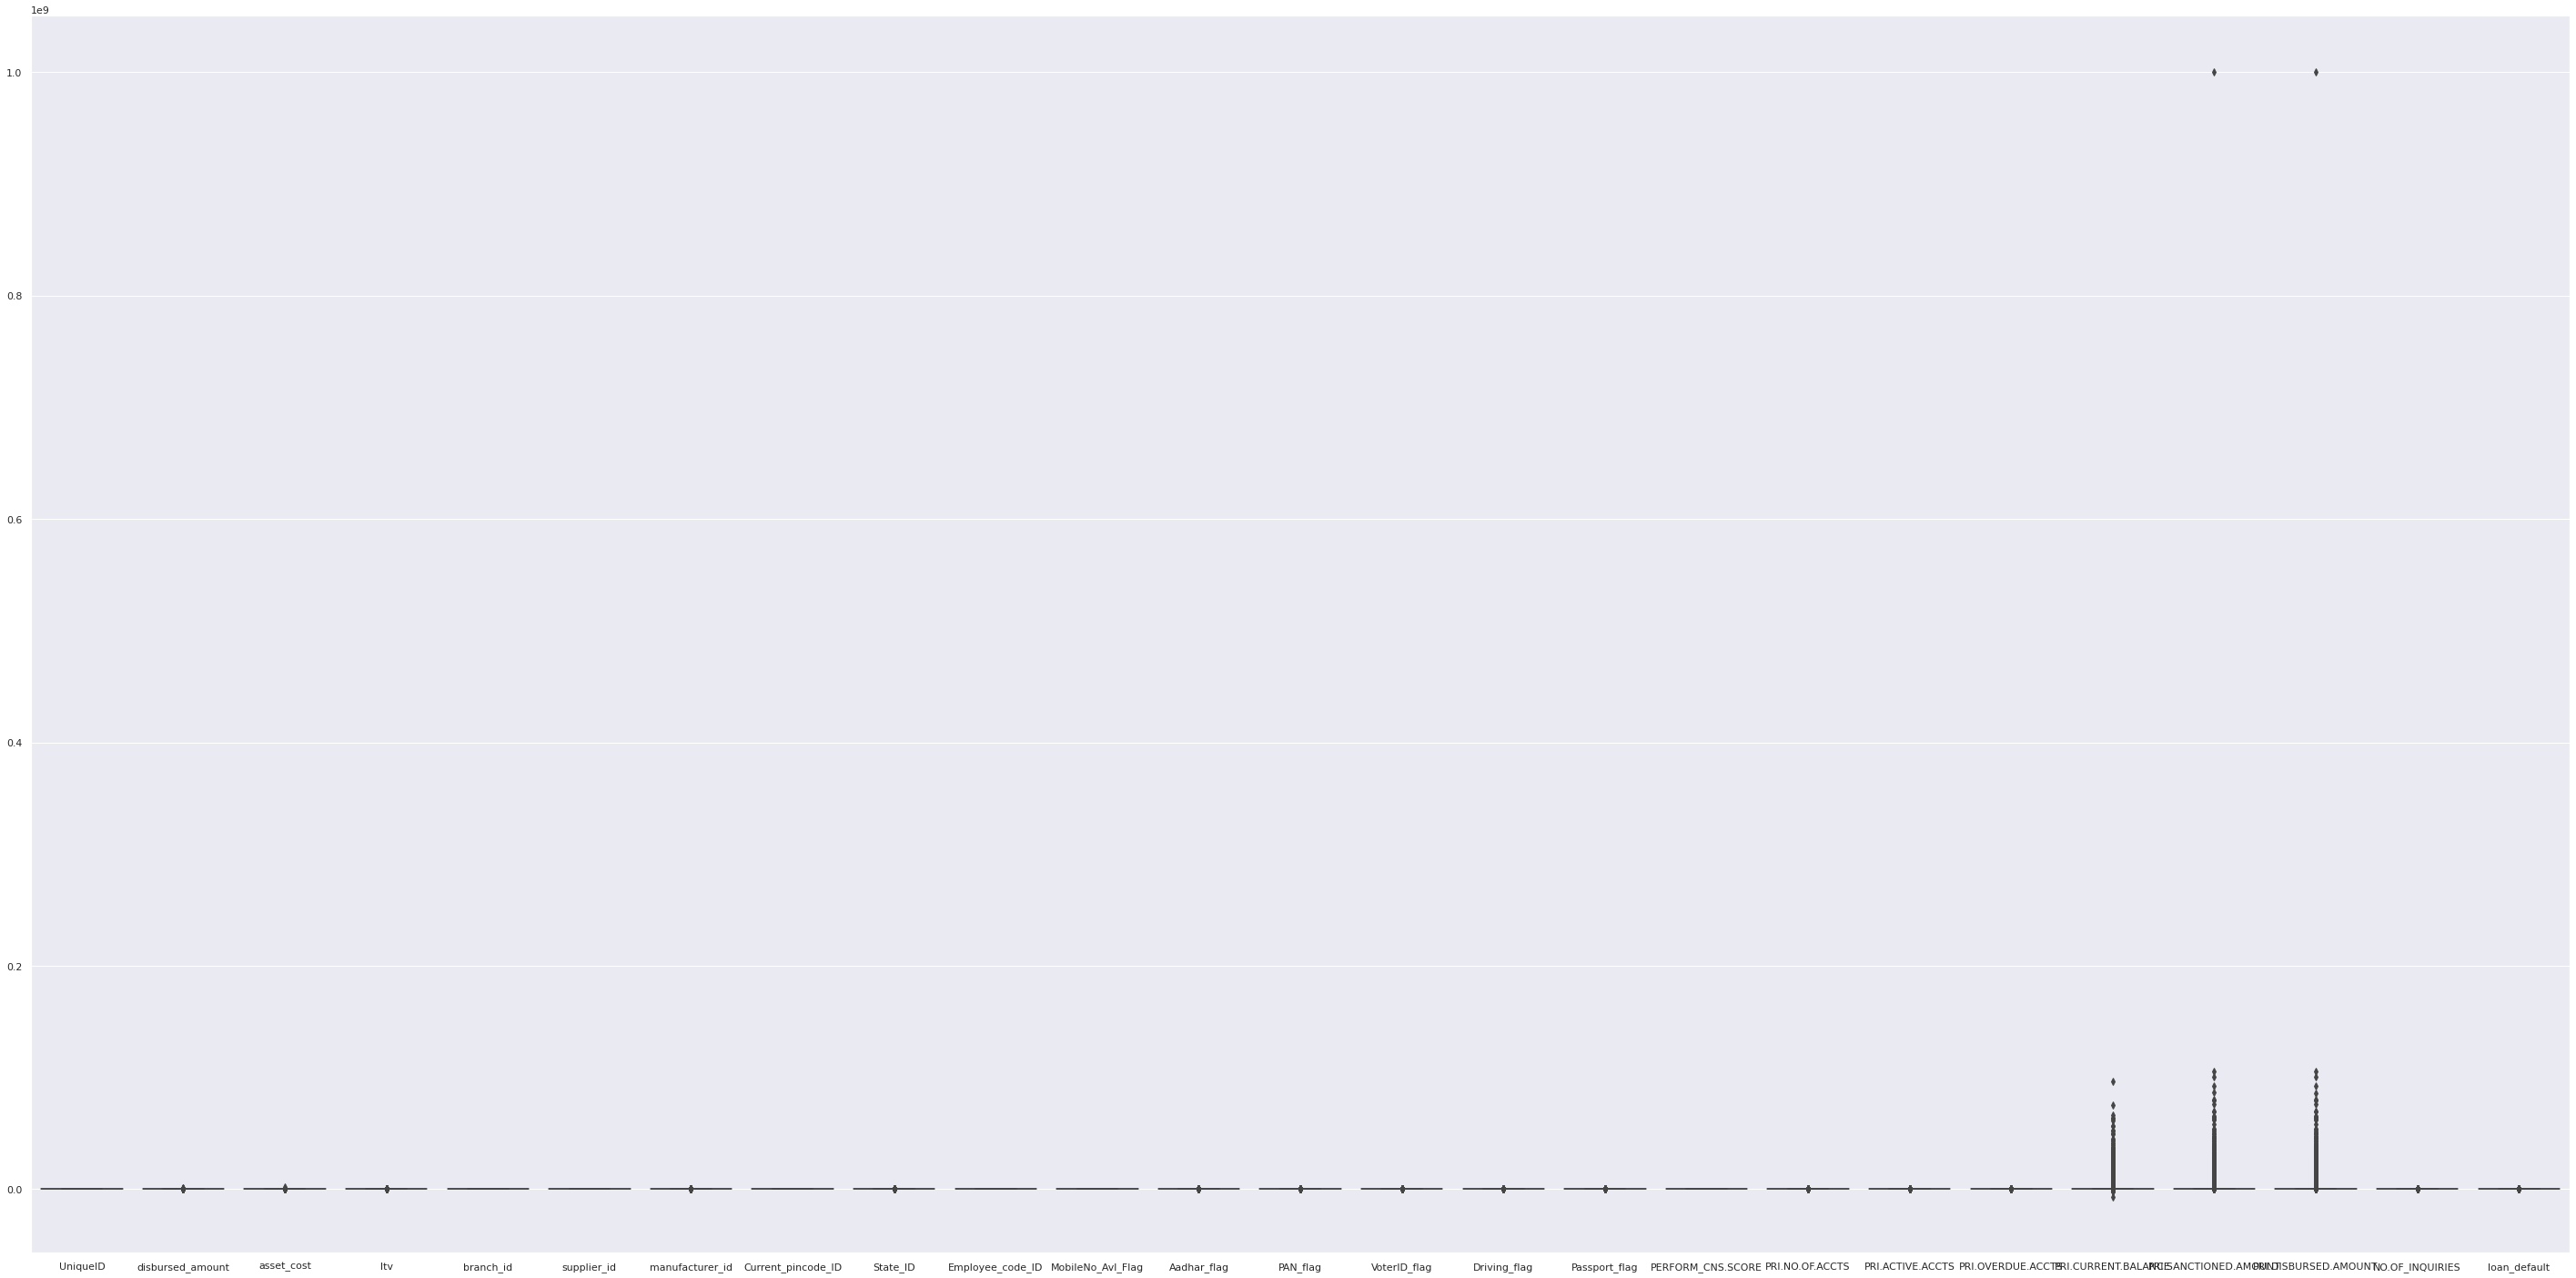

In [ ]:
sb.set(rc={'figure.figsize':(50,25)})
sb.boxplot(data=loan)

we found an outlier in PRI.SANCTIONED.AMOUNT	PRI.DISBURSED.AMOUNT 
according to the given data set and by seeing the above the graph the outliers won't effect much on the output 

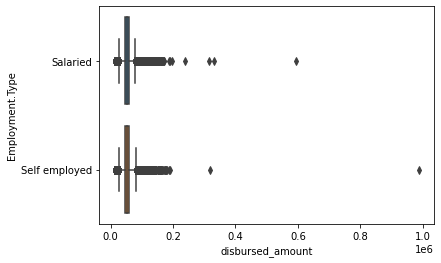

In [ ]:
import seaborn as sb
sb.boxplot(data=loan,y='Employment.Type',x='disbursed_amount')

Distribution Plot:

In [ ]:
loan=pd.read_csv("train_sample.csv")
loan

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,3/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,1/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1/8/1988,Salaried,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,5/12/1988,Self employed,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1/6/1976,Salaried,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


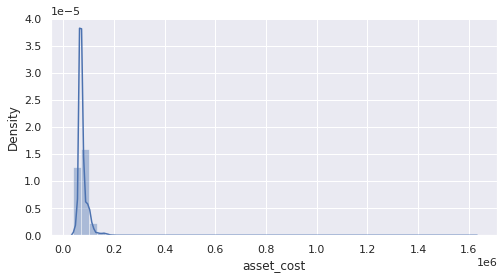

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(rc={"figure.figsize": (8, 4)}); 
x = loan['asset_cost']
ax = sb.distplot(x)
plt.show()

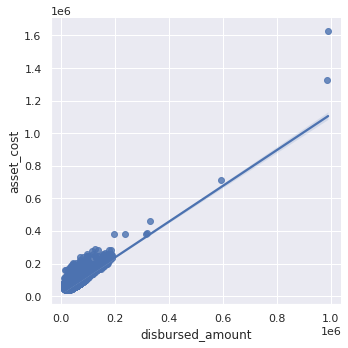

In [ ]:
sb.lmplot(x='disbursed_amount',y='asset_cost',data=loan)   ##linear plot shows the relation between two features

Asset cost is high compared to the disbursed cost as we shown before


the loan snactions for that employees will be successfull 

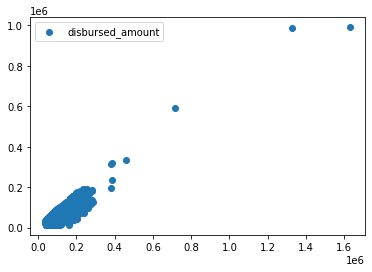

In [75]:
import matplotlib.pyplot as plt
plt.scatter(x='asset_cost',y='disbursed_amount',data=loan)
plt.legend()
plt.show()

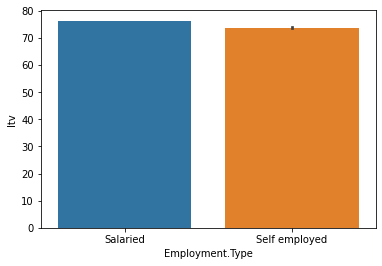

In [83]:
import seaborn as sb
sb.barplot(x='Employment.Type',y='ltv',data=loan)

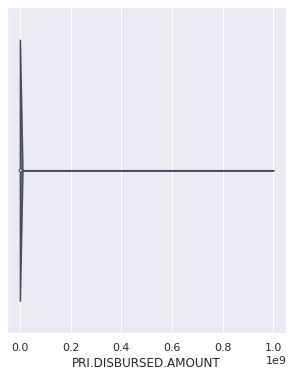

In [86]:
sb.set(rc={'figure.figsize':(5,6)})
sb.violinplot(x='PRI.DISBURSED.AMOUNT',data=loan)

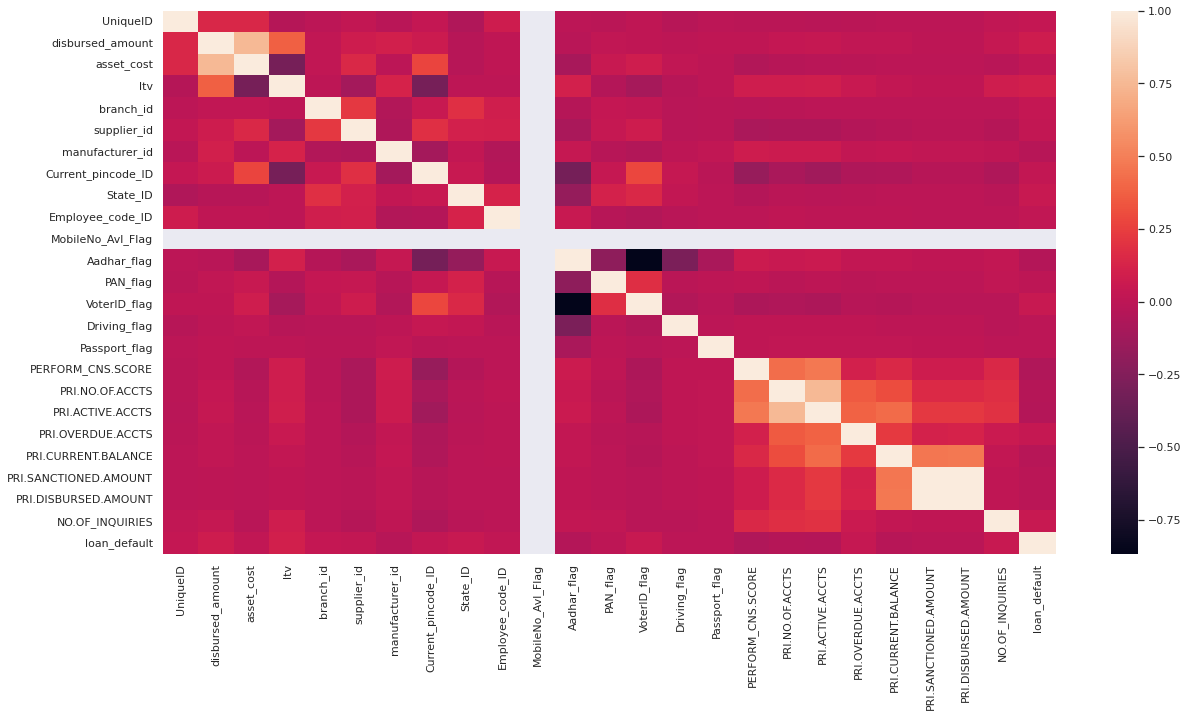

In [92]:
tc=loan.corr()
sb.set(rc={'figure.figsize':(20,10)})
sb.heatmap(tc)


In [110]:
df=loan
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1988-01-08,Salaried,2018-10-26,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,1988-05-12,Self employed,2018-10-23,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1976-01-06,Salaried,2018-10-24,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,1994-03-26,Salaried,2018-09-29,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0


Feature scaling:scaling down the data

Standardization:

standardscalar from sklearn library

In [114]:
df=pd.read_csv("train_sample.csv",usecols=['UniqueID','disbursed_amount','asset_cost','ltv'])
df

,UniqueID,disbursed_amount,asset_cost,ltv
0,420825,50578,58400,89.55
1,537409,47145,65550,73.23
2,417566,53278,61360,89.63
3,624493,57513,66113,88.48
4,539055,52378,60300,88.39
...,...,...,...,...
233149,626432,63213,105405,60.72
233150,606141,73651,100600,74.95
233151,613658,33484,71212,48.45
233152,548084,34259,73286,49.10


In [115]:
df.isnull().sum()

UniqueID            0
disbursed_amount    0
asset_cost          0
ltv                 0
dtype: int64

No null values in the features ready to scale them down

In [107]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [119]:
df_scaled      #3transfromed df

array([[-1.68472007, -0.29133529, -0.92189534,  1.2921334 ],
       [ 0.02183144, -0.55599679, -0.54448189, -0.13237161],
       [-1.73242517, -0.08318323, -0.76565145,  1.29911627],
       ...,
       [ 1.13796097, -1.60916913, -0.24561266, -2.29531487],
       [ 0.17809162, -1.54942178, -0.13613637, -2.23857907],
       [ 1.38029234,  1.64933576,  2.11900139, -0.69274674]])

In [124]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-1.684720,-0.291335,-0.921895,1.292133
1,0.021831,-0.555997,-0.544482,-0.132372
2,-1.732425,-0.083183,-0.765651,1.299116
3,1.296563,0.243307,-0.514764,1.198738
4,0.045926,-0.152567,-0.821604,1.190882
...,...,...,...,...
233149,1.324946,0.682739,1.559268,-1.224318
233150,1.027927,1.487440,1.305636,0.017760
233151,1.137961,-1.609169,-0.245613,-2.295315
233152,0.178092,-1.549422,-0.136136,-2.238579


0-UniqueID,1-disbursed_amount,2-asset_cost,3-ltv

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([-1.68472007, -1.53587739, -1.38703472, -1.23819205, -1.08934937,
        -0.9405067 , -0.79166403, -0.64282135, -0.49397868, -0.34513601,
        -0.19629333, -0.04745066,  0.10139201,  0.25023469,  0.39907736,
         0.54792004,  0.69676271,  0.84560538,  0.99444806,  1.14329073,
         1.2921334 ]),
 <a list of 20 Patch objects>)

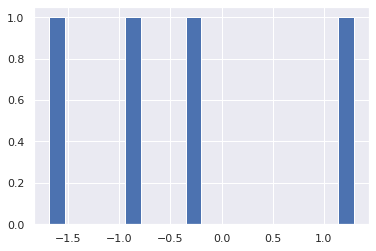

In [128]:
plt.hist(df_scaled[0],bins=20)

(array([1.84946e+05, 4.76000e+04, 5.69000e+02, 3.20000e+01, 1.00000e+00,
        0.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-3.16367956,  0.60330227,  4.3702841 ,  8.13726593, 11.90424776,
        15.67122959, 19.43821142, 23.20519325, 26.97217507, 30.7391569 ,
        34.50613873, 38.27312056, 42.04010239, 45.80708422, 49.57406605,
        53.34104788, 57.10802971, 60.87501154, 64.64199337, 68.4089752 ,
        72.17595703]),
 <a list of 20 Patch objects>)

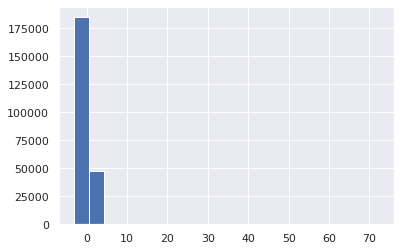

In [129]:
plt.hist(df_scaled[:,1],bins=20)   #disbursed_amount

(array([2.25337e+05, 7.64700e+03, 1.57000e+02, 5.00000e+00, 4.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-2.05149645,  2.15017627,  6.35184899, 10.55352171, 14.75519443,
        18.95686715, 23.15853987, 27.36021258, 31.5618853 , 35.76355802,
        39.96523074, 44.16690346, 48.36857618, 52.5702489 , 56.77192162,
        60.97359433, 65.17526705, 69.37693977, 73.57861249, 77.78028521,
        81.98195793]),
 <a list of 20 Patch objects>)

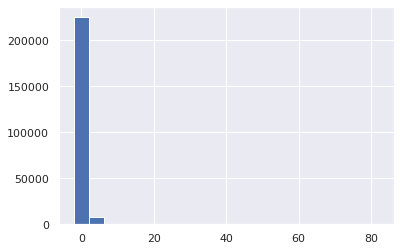

In [137]:
plt.hist(df_scaled[:,2],bins=20)   #for asset_cost

(array([3.0000e+00, 1.2000e+01, 8.0000e+01, 1.9800e+02, 3.8100e+02,
        6.5500e+02, 1.2020e+03, 1.9210e+03, 2.9340e+03, 4.5110e+03,
        6.9040e+03, 9.9340e+03, 1.3643e+04, 1.9428e+04, 2.6506e+04,
        3.6745e+04, 3.9637e+04, 3.8421e+04, 2.9181e+04, 8.5800e+02]),
 array([-5.64883708, -5.27800317, -4.90716925, -4.53633533, -4.16550141,
        -3.7946675 , -3.42383358, -3.05299966, -2.68216574, -2.31133183,
        -1.94049791, -1.56966399, -1.19883007, -0.82799616, -0.45716224,
        -0.08632832,  0.2845056 ,  0.65533951,  1.02617343,  1.39700735,
         1.76784126]),
 <a list of 20 Patch objects>)

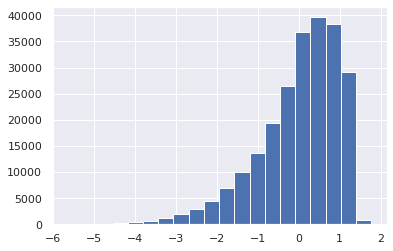

In [133]:
plt.hist(df_scaled[:,3],bins=20)          #ltv

the above graph is left skewed 

MIN MAX SCALING-- THIS MIN MAX SCALING TRANSFORMS THE VALUES BETWWEN 0 AND 1


X_scaled=(X-X.MIN/ X.MAX-X.MIN)

In [142]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax

,UniqueID,disbursed_amount,asset_cost,ltv
0,0.013392,0.038125,0.013442,0.935860
1,0.473007,0.034612,0.017934,0.743792
2,0.000544,0.040888,0.015302,0.936801
3,0.816322,0.045222,0.018287,0.923267
4,0.479496,0.039967,0.014636,0.922208
...,...,...,...,...
233149,0.823966,0.051054,0.042968,0.596563
233150,0.743972,0.061735,0.039950,0.764034
233151,0.773607,0.020633,0.021490,0.452160
233152,0.515091,0.021426,0.022793,0.459809


MOST EFFIECIENT TECHNIQUE IS STANDARD SCALER THAN MINMAX SCALER

(array([2.25337e+05, 7.64700e+03, 1.57000e+02, 5.00000e+00, 4.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

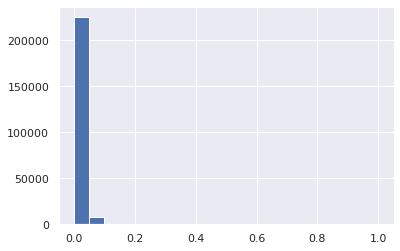

In [143]:
plt.hist(df_minmax['asset_cost'],bins=20)

(array([3.0000e+00, 1.2000e+01, 8.0000e+01, 1.9800e+02, 3.8100e+02,
        6.5500e+02, 1.2020e+03, 1.9210e+03, 2.9340e+03, 4.5110e+03,
        6.9040e+03, 9.9340e+03, 1.3643e+04, 1.9428e+04, 2.6506e+04,
        3.6745e+04, 3.9637e+04, 3.8421e+04, 2.9181e+04, 8.5800e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

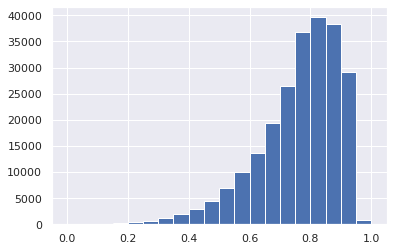

In [144]:
plt.hist(df_minmax['ltv'],bins=20)

ROBUST SCALER--IT IS USED TO SCALE THE FEATURES TO MEDIAN AND QUANTILES

NOTHING BUT IQR(INTER QUANTILE RANGE)

In [145]:
from sklearn.preprocessing import RobustScaler

In [146]:
scaler=RobustScaler()    ###object reference
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler

,UniqueID,disbursed_amount,asset_cost,ltv
0,-0.973785,-0.243066,-0.930384,0.862069
1,0.012097,-0.501809,-0.400156,-0.241379
2,-1.001345,-0.039569,-0.710877,0.867478
3,0.748515,0.279620,-0.358405,0.789723
4,0.026016,-0.107401,-0.789484,0.783638
...,...,...,...,...
233149,0.764912,0.709225,2.555405,-1.087221
233150,0.593323,1.495930,2.199077,-0.125085
233151,0.656890,-1.531429,0.019726,-1.916836
233152,0.102369,-1.473018,0.173529,-1.872887


(array([3.0000e+00, 1.2000e+01, 8.0000e+01, 1.9800e+02, 3.8100e+02,
        6.5500e+02, 1.2020e+03, 1.9210e+03, 2.9340e+03, 4.5110e+03,
        6.9040e+03, 9.9340e+03, 1.3643e+04, 1.9428e+04, 2.6506e+04,
        3.6745e+04, 3.9637e+04, 3.8421e+04, 2.9181e+04, 8.5800e+02]),
 array([-4.51453685, -4.22728195, -3.94002705, -3.65277214, -3.36551724,
        -3.07826234, -2.79100744, -2.50375254, -2.21649763, -1.92924273,
        -1.64198783, -1.35473293, -1.06747803, -0.78022312, -0.49296822,
        -0.20571332,  0.08154158,  0.36879648,  0.65605139,  0.94330629,
         1.23056119]),
 <a list of 20 Patch objects>)

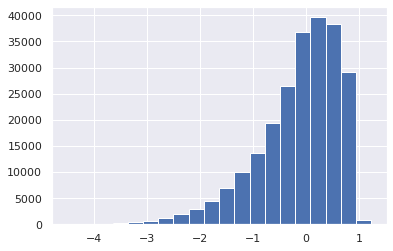

In [147]:
plt.hist(df_robust_scaler['ltv'],bins=20)

TRANSFORMATION:

GUASSIAN TRANSFORMATION:

In [150]:
df=pd.read_csv("train_sample.csv",usecols=['UniqueID','disbursed_amount','asset_cost','ltv'])
df

,UniqueID,disbursed_amount,asset_cost,ltv
0,420825,50578,58400,89.55
1,537409,47145,65550,73.23
2,417566,53278,61360,89.63
3,624493,57513,66113,88.48
4,539055,52378,60300,88.39
...,...,...,...,...
233149,626432,63213,105405,60.72
233150,606141,73651,100600,74.95
233151,613658,33484,71212,48.45
233152,548084,34259,73286,49.10


I WILL CHECK WHEATHER THE VALUES ARE GAUSSIAN DISTRBUTED OR NOT

IF NOT WILL TRANSFORM IT USING THE GAUSSIAN TRANSFORMATION

NO NULL VALUES IN MY FEATURES SO I WILL GO AHEAD

In [154]:
import scipy.stats as stat
import pylab

In [161]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

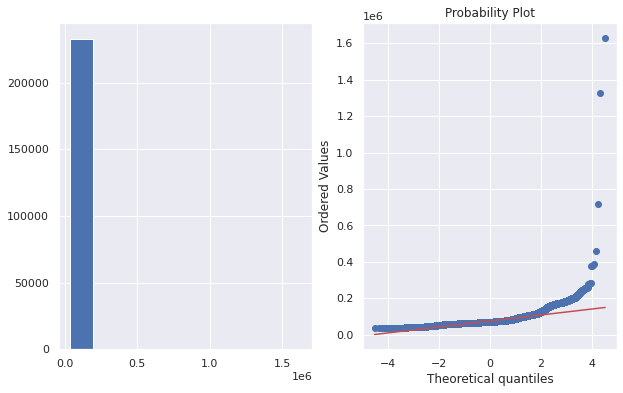

In [162]:
plot_data(df,'asset_cost')   ##i am calling the above function for getting the QQ plot

IF EVERY POINT IN THE ABOVE DISTRIBUTION FALLS ON SAME STRAIGHT LINE THAN IT IS NORMALLY DISTRIBUTED


COMING TO THE ABOVE GRAPH IN ASSET_COST MOST OF THE VALUES ARE FALLING ON THE SAME STRAIGHT LINE BUT THERE ARE SOME VALUES WHICH ARE NOT FALLING ON THAT LINE SO WILL TRY TO USE DIFFERENT TECHNIQUES TO CONVERT INTO GAUSSIAN DISTRIBUTION.

LOGARTHMIC TRANSFORMATION :

In [166]:
import numpy as np
df['asset_cost_log']=np.log(df['asset_cost'])

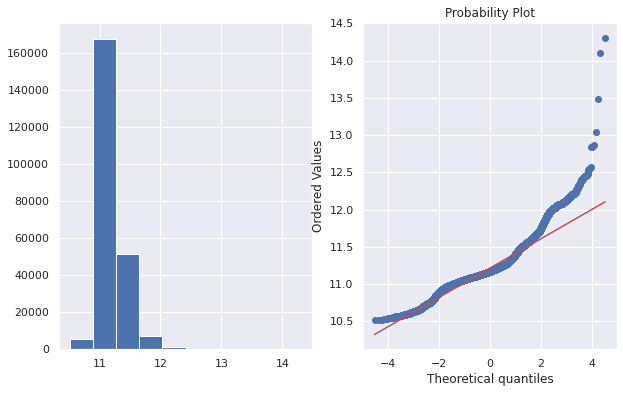

In [168]:
plot_data(df,'asset_cost_log')

AFTER APPLYING THE LOGARTHMIC TRANSFORMATION, WE FOUND THAT AGAIN THE POINTS ARE NOT FALLING ON THE STRAIGHT LINE


SO WILL GO FOR ANOTHER TECHNIQUE

RECIPROCAL TRANSFORMATION:

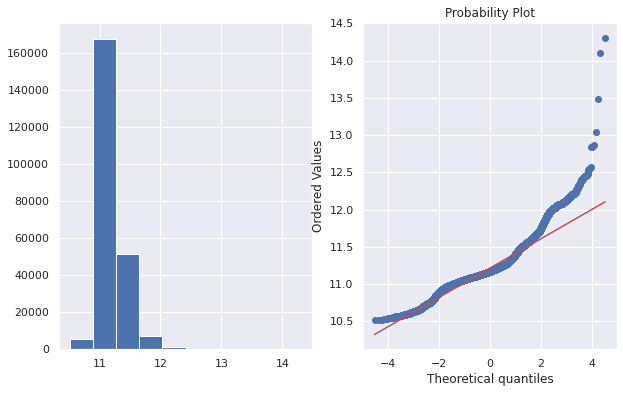

In [172]:
df['asset_cost_reciprocal']=1/df.asset_cost   ##RECIPROCAL
plot_data(df,'asset_cost_log')

EVEN THIS TECHNIQUE IS NOT WORKING

SQUARE ROOT TRANSFORMATION

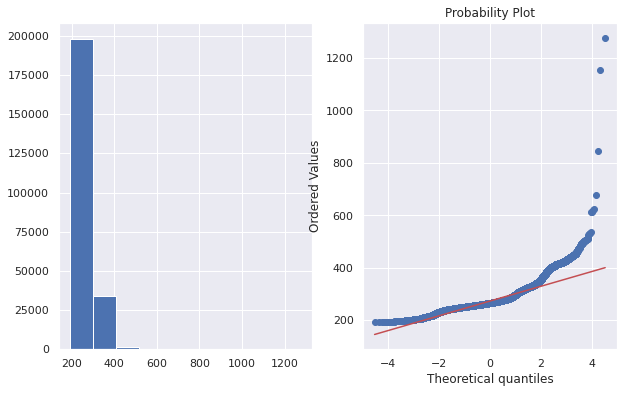

In [173]:
df['asset_cost_sqrt']=df.asset_cost**(1/2)
plot_data(df,'asset_cost_sqrt')

EXPONENTIAL TRANSFORMATIOM

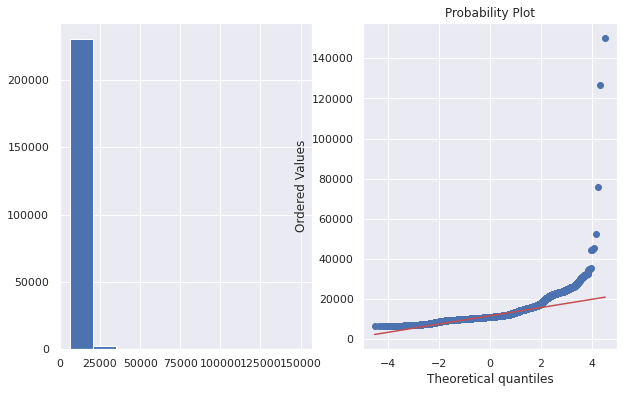

In [174]:
df['asset_cost_exp']=df.asset_cost**(1/1.2)
plot_data(df,'asset_cost_exp')

BOXCOX TRANSFORMATION

In [177]:
df['asset_cost_Boxcox'],parameters=stat.boxcox(df['asset_cost'])

In [178]:
print(parameters)

-1.3072833271960491


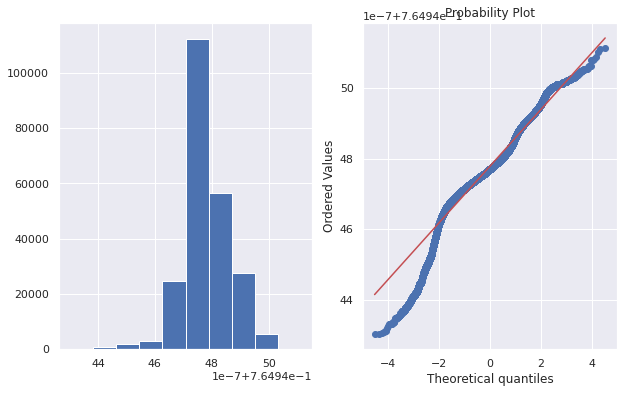

In [179]:
plot_data(df,'asset_cost_Boxcox')

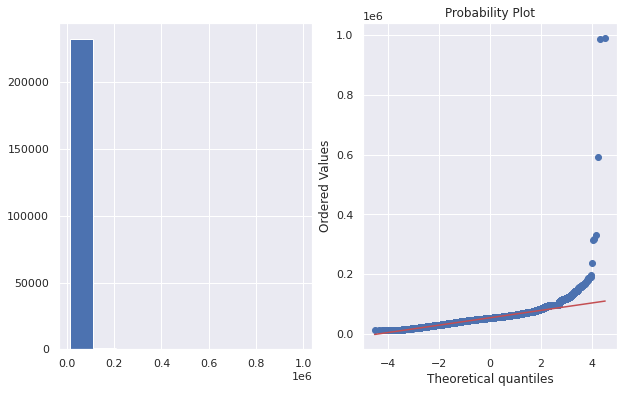

In [163]:
plot_data(df,'disbursed_amount') 

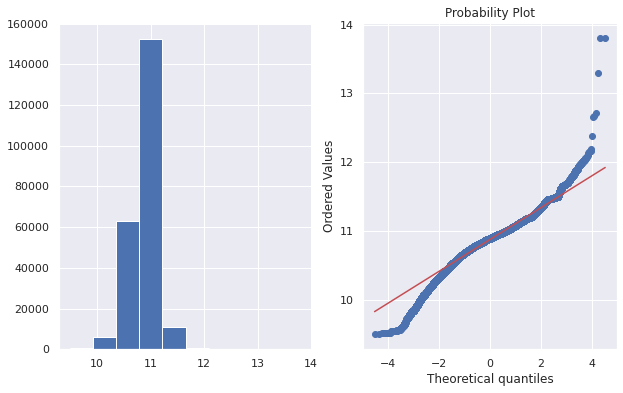

In [170]:
import numpy as np
df['disbursed_amount_log']=np.log(df['disbursed_amount'])
plot_data(df,'disbursed_amount_log')

LOGARTHEMIC TRANSFORMATION IS NOT SATISFIED FOR THE FEATURE DISBURSED_AMOUNT TOO

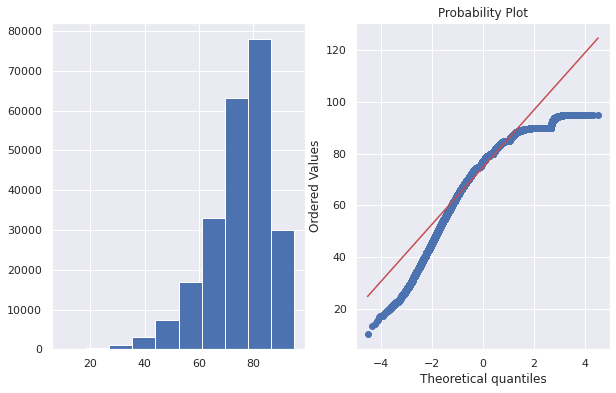

In [164]:
plot_data(df,'ltv') 

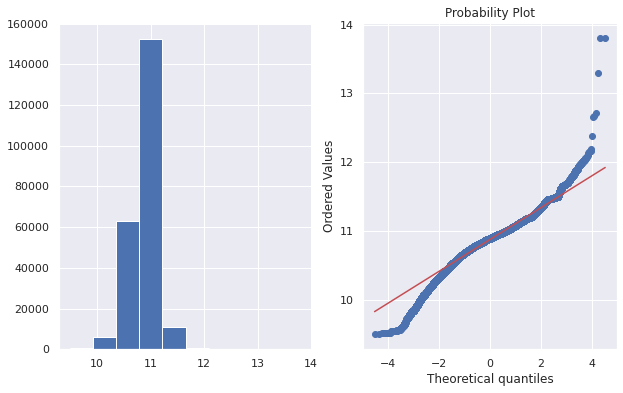

In [171]:
df['ltv_log']=np.log(df['disbursed_amount'])
plot_data(df,'ltv_log')

I ANALYZED EVERYTHING RELATED TO THE GIVEN DATA WHICH WILL BE HELPFULL FOR MY FUTURE MODEL PREDICTIONS AND FOR GETTING GOOD ACCURACY

AND VISULIZED ALL THE ANALIZATION USING DIFFERENT GRAPHS

AS WE DID MANY TRANSFORM TECHNIQUES TO GET TO KNOW EVERYTHING ABOUT OUR FEATURES BY KEEPING DIFFERENT MACHINE LEARNING ALGORITHMS IN MIND
